# Jupyter Data Science Workflow
**From exploratory analysis to reproducible science**

**Source of the Data**:  
https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k

In [1]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

**Download the data set**

In [2]:
from urllib.request import urlretrieve
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x2791eace280>)

**Initial preparation steps, so that I can use/manipulate the data:** 
- Safe the data 
- set the index colum to date
- parse the date from string to dates

In [3]:
import pandas as pd
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


**Start Visualization**  
- matplotlib inline - shows the plots inside the notebook
- .plot() - shows the data

<AxesSubplot:xlabel='Date'>

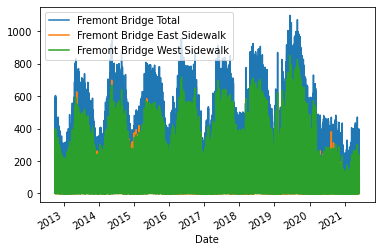

In [4]:
%matplotlib inline
data.plot()

**Resample**  
Resample the data weekly and show the sum per week

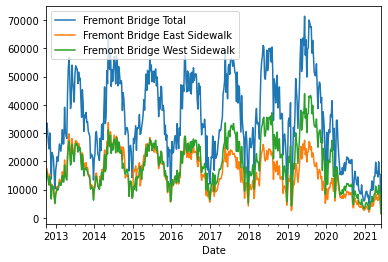

In [5]:
data.resample('w').sum().plot();

Changing the **stlye of the plot**
- new style
- change legend

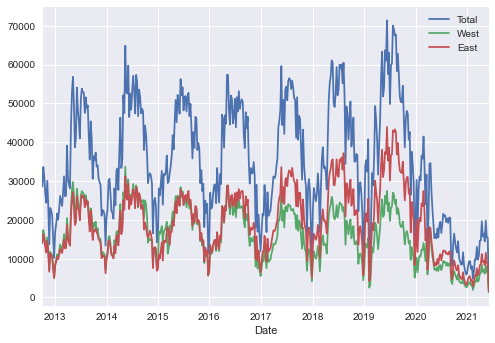

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

data.columns=['Total', 'West', 'East']

data.resample('w').sum().plot();

See if there are **anual trends**
- Focus on the daily cases
- show a roling window (sum per day)
- set the offset to 0, None

(0.0, 2526518.55)

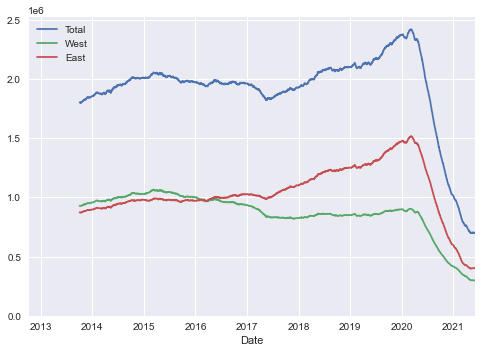

In [13]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

See if there is a **trend within a day**
- Group by time of day 
- Take the mean

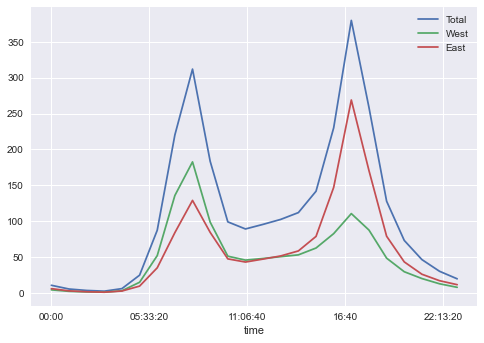

In [8]:
data.groupby(data.index.time).mean().plot();

**Create a Pivot table**  
A Pivot Table is used to summarise, sort, reorganise, group, count, total or average data stored in a table. It allows us to transform columns into rows and rows into columns. It allows grouping by any field (column), and using advanced calculations on them.

In [9]:
pivoted=data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


**Plot the Pivoted table** - result is a a line for each day (legend set as false)

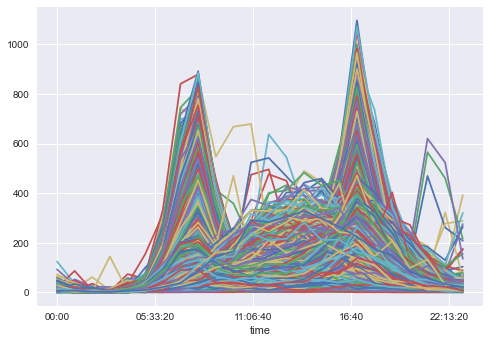

In [10]:
pivoted.plot(legend=False); 

Decrease the transparency of each line (alpha=0.01), to better visualize

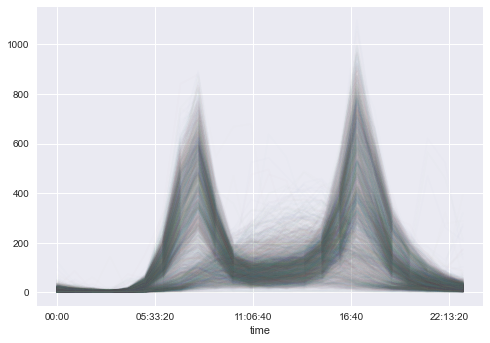

In [11]:
pivoted.plot(legend=False, alpha=0.01);